In [4]:
# open data set and drop missing data.
import pandas as pd 
import numpy as np 
df = pd.read_csv('state-tax-govt-data.csv')
df['log_gdp'] = np.log(1+df['gsp_q'])
df['log_deathtax'] = np.log(1+df['death_and_gift_tax'])
keep = pd.notnull(df['log_gdp'] ) & pd.notnull(df['log_deathtax'])
df = df[keep]

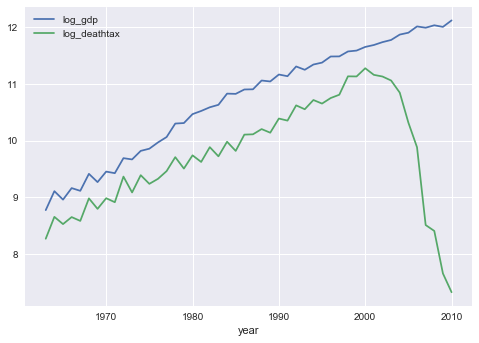

In [5]:
# Plot values over time
import matplotlib.pyplot as plt
plt.style.use('seaborn')
df.groupby('year')[['log_gdp','log_deathtax']].mean().plot()

Set up fixed effects regression.

In [6]:
# Set up state-year indexing (first index is entity, second index is time)
df.set_index(['state', 'year'], inplace=True)
df.head()

tax_legis  lastdemmargin  term_length  years_left_before_limit  \
state year                                                                   
AK    1963    87536.0       4.539440          4.0                      7.0   
      1964    97367.0       4.539440          4.0                      6.0   
      1965    38874.0       4.539440          4.0                      5.0   
      1966    73835.0       4.539440          4.0                      4.0   
      1967    69378.0      -1.629107          4.0                      7.0   

            sen_dem_per_2pty  hs_dem_per_2pty  veto_override_prop  \
state year                                                          
AK    1963              75.0             50.0            0.666667   
      1964              75.0             50.0            0.666667   
      1965              85.0             75.0            0.666667   
      1966              85.0             75.0            0.666667   
      1967              30.0             37.5            0.666667   

            vote_nec_budg  vote_nec_any_tax_inc statename      ...       \
state year                                                     ...        
AK    1963            0.5                   0.5    Alaska      ...        
      1964            0.5                   0.5    Alaska      ...        
      1965            0.5                   0.5    Alaska      ...        
      1966            0.5                   0.5    Alaska      ...        
      1967            0.5                   0.5    Alaska      ...        

            total_debt_outstanding_inc  total_revenue_inc  \
state year                                                  
AK    1963                    6.545413           16.33538   
      1964                    9.081272           17.92905   
      1965                   11.803410           19.86569   
      1966                   12.230670           19.24643   
      1967                   13.608240           22.96428   

            general_revenue_inc  taxes_inc  total_expenditure_inc  \
state year                                                          
AK    1963             15.12386   4.951736               17.43731   
      1964             16.71686   4.388086               19.73841   
      1965             18.53499   4.576617               21.02485   
      1966             17.88379   5.117784               19.69124   
      1967             21.52782   5.148005               24.09957   

            general_expenditure_inc  budget_surplus_inc  real_leg_tot_exp  \
state year                                                                  
AK    1963                 16.60124           -1.477384         4489681.0   
      1964                 18.98780           -2.270936         5024720.0   
      1965                 20.41236           -1.877370         4937005.0   
      1966                 18.96175           -1.077954         5360429.0   
      1967                 23.39546           -1.867633         5543717.0   

             log_gdp  log_deathtax  
state year                          
AK    1963  6.988413      4.077537  
      1964  7.115582      4.499810  
      1965  7.226209      5.897154  
      1966  7.309881      4.406719  
      1967  7.404888      4.653960  

[5 rows x 94 columns]

In [11]:
from linearmodels.panel import PanelOLS
model = PanelOLS.from_formula('log_gdp ~ log_deathtax + EntityEffects + TimeEffects', data=df)

In [23]:
# Run the regression
results = model.fit()
results

Dep. Variable:,log_gdp,R-squared:,0.0163
Estimator:,PanelOLS,R-squared (Between):,0.0295
No. Observations:,2068,R-squared (Within):,0.0156
Date:,"Sun, Oct 07 2018",R-squared (Overall):,0.0295
Time:,21:42:54,Log-likelihood,1089.2
Cov. Estimator:,Unadjusted,,
,,F-statistic:,32.580
Entities:,50,P-value,0.0000
Avg Obs:,41.360,Distribution:,"F(1,1970)"
Min Obs:,24.000,,
Max Obs:,48.000,F-statistic (robust):,32.580


In [24]:
# Add clustered errors
results = model.fit(cov_type='clustered', cluster_entity=True,  cluster_time=True)
results

Dep. Variable:,log_gdp,R-squared:,0.0163
Estimator:,PanelOLS,R-squared (Between):,0.0295
No. Observations:,2068,R-squared (Within):,0.0156
Date:,"Sun, Oct 07 2018",R-squared (Overall):,0.0295
Time:,21:42:57,Log-likelihood,1089.2
Cov. Estimator:,Clustered,,
,,F-statistic:,32.580
Entities:,50,P-value,0.0000
Avg Obs:,41.360,Distribution:,"F(1,1970)"
Min Obs:,24.000,,
Max Obs:,48.000,F-statistic (robust):,1.3253
